# All

## Tone

<Figure size 1000x600 with 0 Axes>

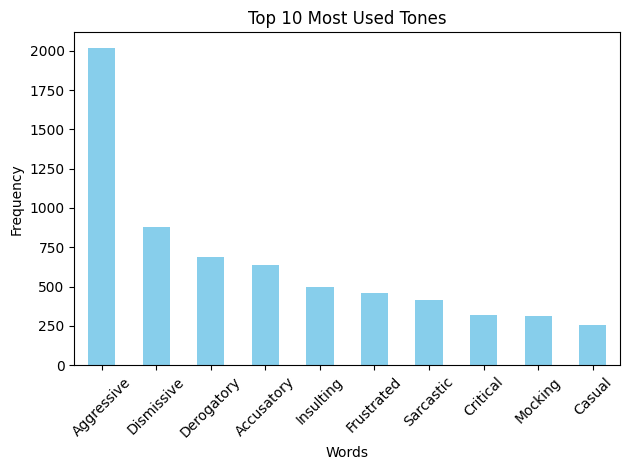

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# List of file names
files = ["unique_words_AM.csv", "unique_words_EN.csv", "unique_words_AR.csv", "unique_words_DE.csv", 
         "unique_words_ES.csv", "unique_words_HI.csv", "unique_words_RU.csv", "unique_words_UK.csv", 
         "unique_words_ZH.csv"]

total_sentences = 9000
# Initialize counters for each column to sum the counts
tone_counter = Counter()
language_counter = Counter()
implied_sentiment_counter = Counter()
combine_counter = Counter()

# Read each file and update the counters
for file in files:
    df = pd.read_csv(file)
    for tone, count in zip(df['Tone'], df['Tone appears']):
        if pd.notna(tone):  
            tone_counter[tone] += count
    for language, count in zip(df['Language'], df['Language appears']):
        if pd.notna(language):  
            language_counter[language] += count
    for sentiment, count in zip(df['Implied Sentiment'], df['Implied Sentiment appears']):
        if pd.notna(sentiment):  
            implied_sentiment_counter[sentiment] += count
    for combine, count in zip(df['combine'], df['combine appears']):
        if pd.notna(combine):  
            combine_counter[combine] += count

# Convert counters to DataFrames
tone_df = pd.DataFrame(tone_counter.items(), columns=['Tone', 'Tone appears']).sort_values(by='Tone appears', ascending=False).reset_index(drop=True)
language_df = pd.DataFrame(language_counter.items(), columns=['Language', 'Language appears']).sort_values(by='Language appears', ascending=False).reset_index(drop=True)
implied_sentiment_df = pd.DataFrame(implied_sentiment_counter.items(), columns=['Implied Sentiment', 'Implied Sentiment appears']).sort_values(by='Implied Sentiment appears', ascending=False).reset_index(drop=True)
combine_df = pd.DataFrame(combine_counter.items(), columns=['combine', 'combine appears']).sort_values(by='combine appears', ascending=False).reset_index(drop=True)

# Function to plot histogram for a given DataFrame
def plot_histogram(df, column, count_column, title):
    plt.figure(figsize=(10, 6))
    df.head(10).plot(kind='bar', x=column, y=count_column, legend=False, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot pie chart for the 'combine' column
def plot_pie_chart(df, column, count_column, total_sentences, title):
    df = df.head(10).copy()  # Make a copy to avoid SettingWithCopyWarning
    df['percentage'] = (df[count_column] / total_sentences) * 100
    plt.figure(figsize=(10, 6))
    plt.pie(df['percentage'], labels=df[column], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histogram(tone_df, 'Tone', 'Tone appears', 'Top 10 Most Used Tones')




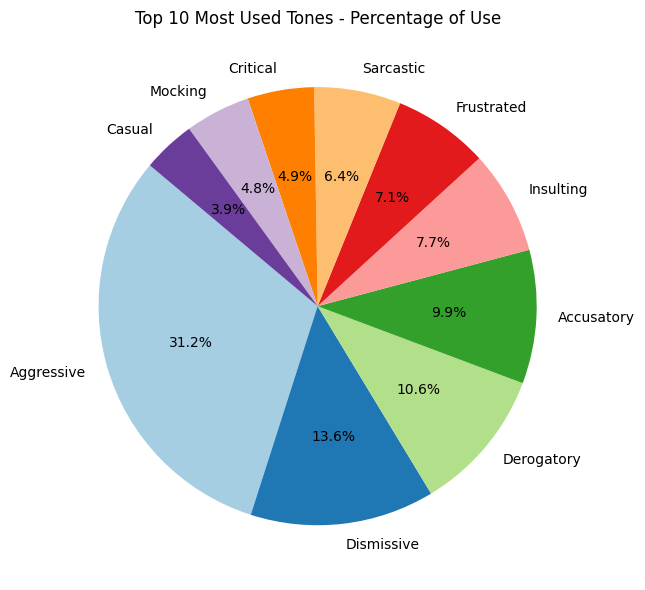

In [62]:
plot_pie_chart(tone_df, 'Tone', 'Tone appears', total_sentences, 'Top 10 Most Used Tones - Percentage of Use')

## Language

<Figure size 1000x600 with 0 Axes>

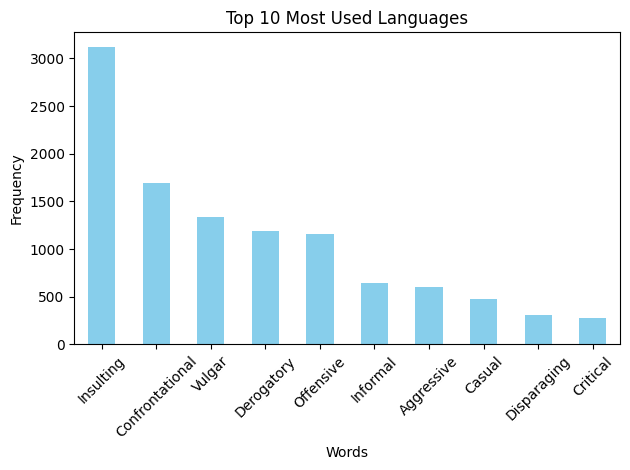

In [63]:
plot_histogram(language_df, 'Language', 'Language appears', 'Top 10 Most Used Languages')


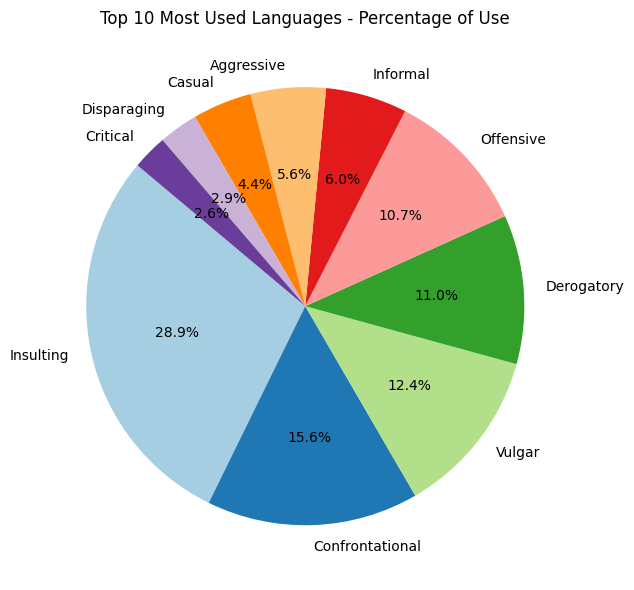

In [64]:
plot_pie_chart(language_df, 'Language', 'Language appears', total_sentences, 'Top 10 Most Used Languages - Percentage of Use')

## Sentiment

<Figure size 1000x600 with 0 Axes>

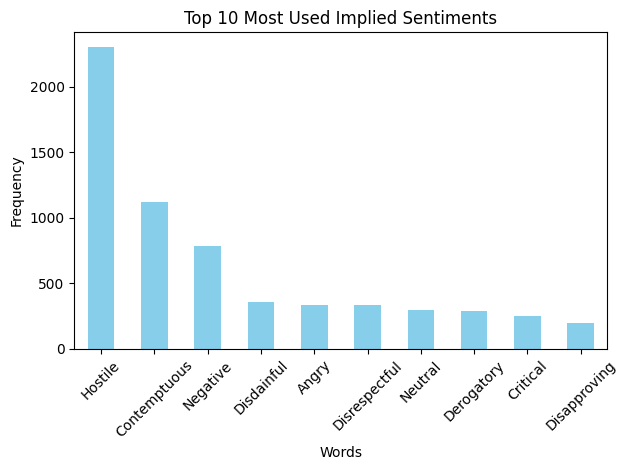

In [65]:
plot_histogram(implied_sentiment_df, 'Implied Sentiment', 'Implied Sentiment appears', 'Top 10 Most Used Implied Sentiments')

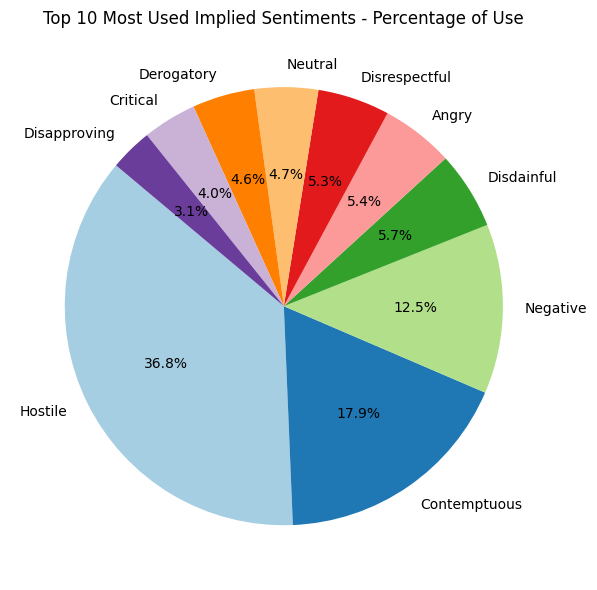

In [66]:
plot_pie_chart(implied_sentiment_df, 'Implied Sentiment', 'Implied Sentiment appears', total_sentences, 'Top 10 Most Used Implied Sentiments - Percentage of Use')

## All columns combine

<Figure size 1000x600 with 0 Axes>

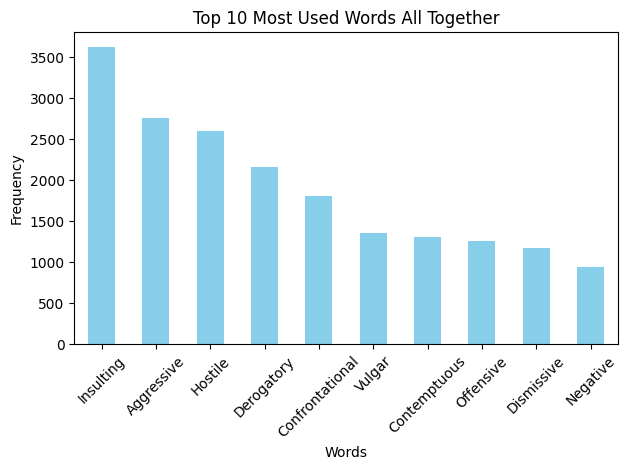

In [67]:
# Plot combined histogram for the 'Combine' column
plot_histogram(combine_df, 'combine', 'combine appears', 'Top 10 Most Used Words All Together')


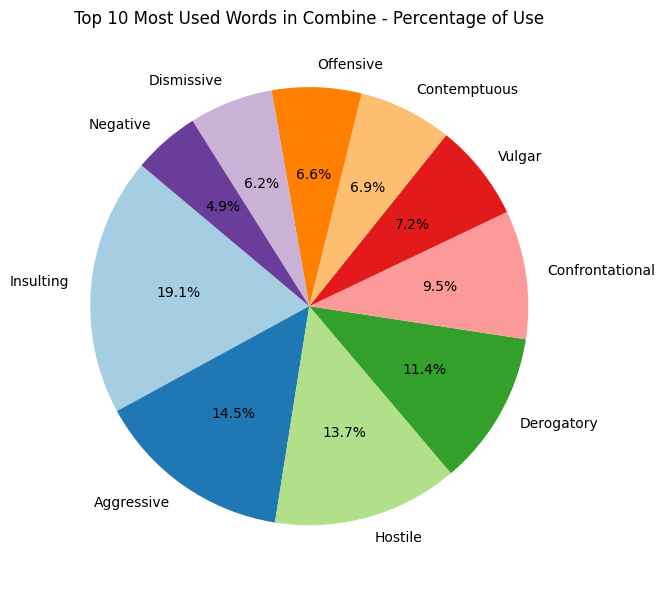

In [68]:
# Plot pie chart for 'combine'
plot_pie_chart(combine_df.head(10), 'combine', 'combine appears',total_sentences, 'Top 10 Most Used Words in Combine - Percentage of Use')

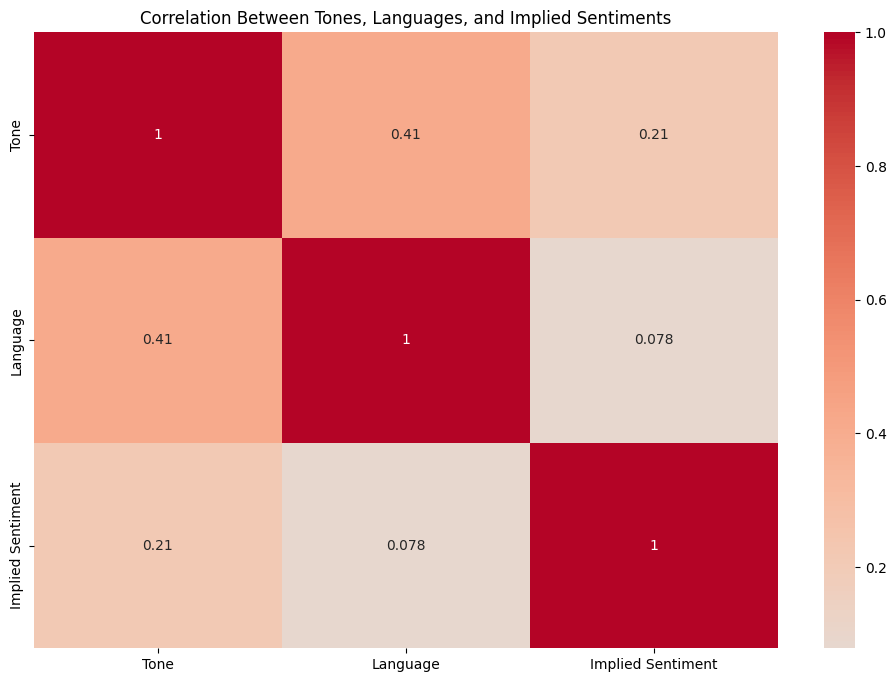

In [69]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

In [ ]:
df_t = pd.read_csv('600-test/UK-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

<Figure size 1000x600 with 0 Axes>

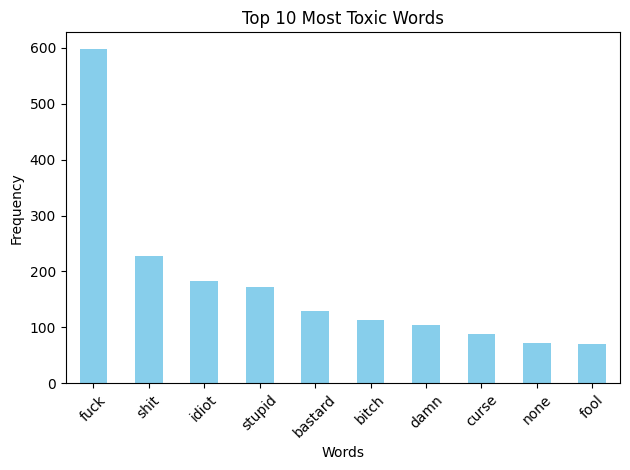

  uniq sequences  number appears
0           fuck             598
1           shit             228
2          idiot             183
3         stupid             173
4        bastard             129
5          bitch             113
6           damn             104
7          curse              89
8           none              72
9           fool              71


In [75]:
# List of file names
toxic_files = ["600-test/UK-toxic.csv", "600-test/RU-toxic.csv", "600-test/DE-toxic.csv", "600-test/EN-toxic.csv", 
         "600-test/ES-toxic.csv", "600-test/ZH-toxic.csv", "600-test/HI-toxic.csv", "600-test/AR-toxic.csv", 
         "600-test/AM-toxic.csv"]


# Initialize counters for each column to sum the counts
toxic_counter = Counter()

# Read each file and update the counters
for file in toxic_files:
    df = pd.read_csv(file)
    for toxic, count in zip(df['uniq sequences'], df['number appears']):
        if pd.notna(toxic):  
            toxic_counter[toxic] += count


# Convert counters to DataFrames
toxic_df = pd.DataFrame(toxic_counter.items(), columns=['uniq sequences', 'number appears']).sort_values(by='number appears', ascending=False).reset_index(drop=True)

# Function to plot histogram for a given DataFrame
def plot_histogram(df, column, count_column, title):
    plt.figure(figsize=(10, 6))
    df.head(10).plot(kind='bar', x=column, y=count_column, legend=False, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histogram(toxic_df, 'uniq sequences', 'number appears', 'Top 10 Most Toxic Words')
print(toxic_df.head(10))

